# Gastrulation

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir='/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

time: 4.97 s (started: 2022-06-04 17:32:22 -05:00)


## Load detail

In [2]:
cellDancer_df_file='/Users/pengzhizhang/pseudotime/data/Gastrulation/velocity_result/celldancer_estimation.csv'
cellDancer_df=pd.read_csv(cellDancer_df_file)
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880


time: 45.6 s (started: 2022-06-04 17:32:27 -05:00)


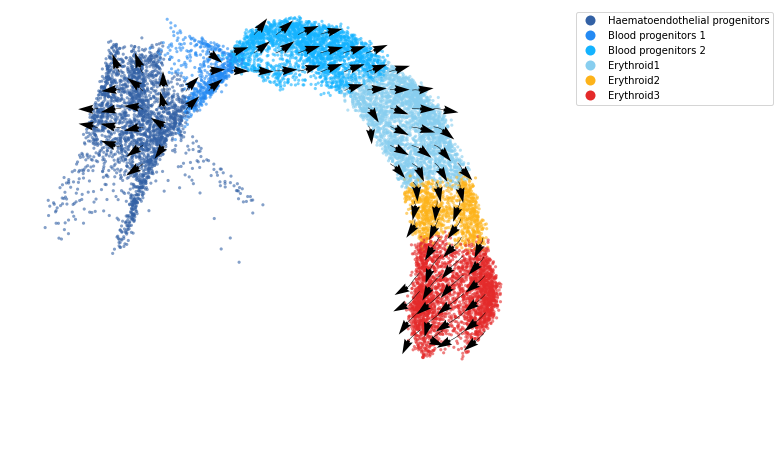

time: 1min 11s (started: 2022-06-04 17:33:13 -05:00)


In [3]:
%autoreload 2

# Set Parameters
projection_neighbor_choice='gene'
expression_scale='power10'
projection_neighbor_size=10
speed_up=(100,100)

# Compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# Plot cell velocity
# Set Parameters
min_mass=15
arrow_grid=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]

fig, ax = plt.subplots(figsize=(10,8))
im = cdplt.cell.scatter_cell(
    ax,cellDancer_df, 
    colors=colormap.colormap_erythroid, 
    alpha=0.6, 
    s=10,
    velocity=True, 
    legend='on',
    min_mass=min_mass,
    arrow_grid=arrow_grid, 
    custom_xlim=custom_xlim, 
    custom_ylim=custom_ylim)
ax.axis('off')
plt.show()

In [4]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,index,velocity1,velocity2
0,0,Ift81,0.010658,0.026321,0.009261,0.029549,0.023595,0.042598,0.073999,0.039626,cell_363,Blood progenitors 2,3.460521,15.574629,0,NaN,NaN
1,1,Ift81,0.000000,0.044266,0.000946,0.037888,0.020649,0.042942,0.074502,0.039626,cell_382,Blood progenitors 2,2.490433,14.971734,1,NaN,NaN
2,2,Ift81,0.000000,0.064559,0.000885,0.055191,0.019326,0.042876,0.075031,0.039626,cell_385,Blood progenitors 2,2.351203,15.267069,2,-0.111304,-0.062523
3,3,Ift81,0.000000,0.020756,0.001014,0.017791,0.022149,0.043030,0.073879,0.039626,cell_393,Blood progenitors 2,5.899098,14.388825,3,0.365885,0.094445
4,4,Ift81,0.000000,0.013184,0.001037,0.011305,0.022633,0.043055,0.073676,0.039626,cell_398,Blood progenitors 2,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Mcrip1,0.000000,1.128435,0.000157,1.125867,0.005920,0.038023,0.013131,0.051755,cell_139318,Erythroid3,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Mcrip1,0.024356,0.970672,0.016090,1.428982,0.008338,0.037053,0.013950,0.051755,cell_139321,Erythroid3,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Mcrip1,0.000000,0.899107,0.000175,0.897000,0.006575,0.037644,0.013522,0.051755,cell_139326,Erythroid3,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Mcrip1,0.017375,1.398107,0.011387,1.729827,0.006885,0.037765,0.013271,0.051755,cell_139327,Erythroid3,9.990495,7.243880,12327,NaN,NaN


time: 16.3 ms (started: 2022-06-03 14:21:17 -05:00)


## Estimate pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████| 9490/9490 [00:11<00:00, 817.68it/s] 


use path_similarity:  0.25
There are 3 clusters.
[0 1 2]


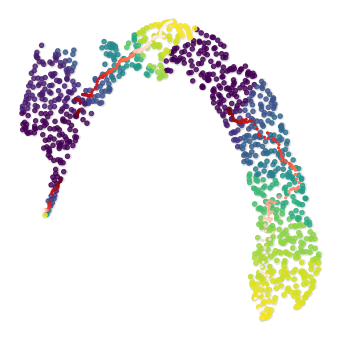




Cluster  0
Total cells in the cluster:  581
MAX allowed zero time cells:  29
MAX allowed terminal cells:  29
Only  3  terminal cells left.
[277, 896, 934]
141  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  141
MAX allowed zero time cells:  29
MAX allowed terminal cells:  29
Only  7  zero cells left. 
[238, 245, 392, 441, 678, 741, 944]
61  terminal cells left.
Sample trajs for terminal cells in cluster  0  ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  61
MAX allowed zero time cells:  29
MAX allowed terminal cells:  29
Only  9  zero cells left. 
[216, 377, 541, 671, 684, 702, 713, 755, 800]
Only  1  terminal cells left.
[116]
number of paths:  3
number of subclusters:  3

Display reference paths for cluster 0


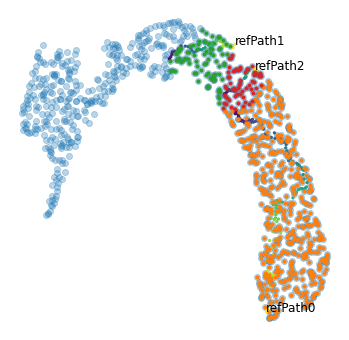


intercluster cell time adjustment
number of cells:  581
Cutoff is  0.0536003707663197
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (720, 733)

Peak mode:  least_shift


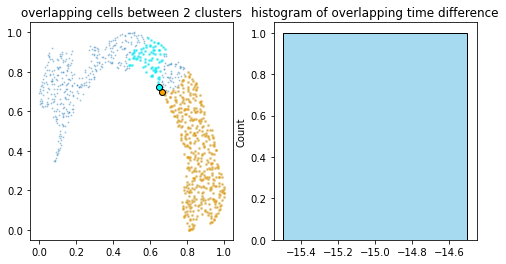

Time shift is:  -15
The overlapping cells are: 
cell  720  from cluster  0  and  733  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (121, 194)
pair_cellIDs:  (655, 102)
pair_cellIDs:  (679, 181)
pair_cellIDs:  (720, 713)
pair_cellIDs:  (208, 777)
pair_cellIDs:  (752, 216)
pair_cellIDs:  (412, 154)
pair_cellIDs:  (527, 726)
pair_cellIDs:  (210, 377)
pair_cellIDs:  (797, 242)
pair_cellIDs:  (548, 125)
pair_cellIDs:  (460, 758)
pair_cellIDs:  (114, 790)
pair_cellIDs:  (147, 541)
pair_cellIDs:  (788, 662)
pair_cellIDs:  (540, 664)
pair_cellIDs:  (654, 256)

Peak mode:  most_frequent_shift


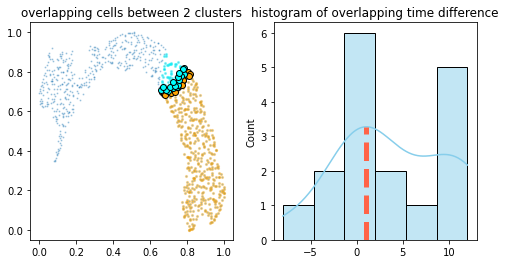

Time shift is:  0
The overlapping cells are: 
cell  679  from cluster  0  and  181  from cluster  2

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (117, 670)
pair_cellIDs:  (733, 755)
pair_cellIDs:  (190, 684)
pair_cellIDs:  (88, 695)
pair_cellIDs:  (542, 649)
pair_cellIDs:  (63, 666)
pair_cellIDs:  (525, 800)
pair_cellIDs:  (188, 659)
pair_cellIDs:  (131, 135)
pair_cellIDs:  (750, 702)
pair_cellIDs:  (693, 141)
pair_cellIDs:  (697, 528)
pair_cellIDs:  (748, 64)
pair_cellIDs:  (229, 745)
pair_cellIDs:  (665, 531)

Peak mode:  most_frequent_shift


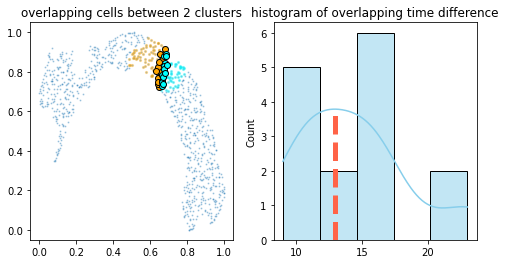

Time shift is:  12
The overlapping cells are: 
cell  63  from cluster  1  and  666  from cluster  2


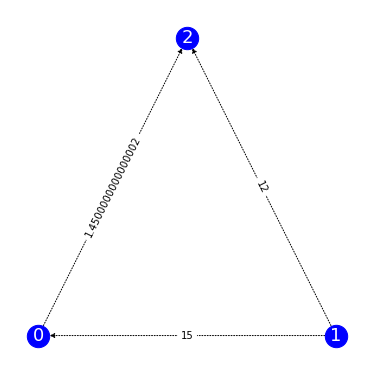

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -15, 2: -3}



Cluster  1
Total cells in the cluster:  354
MAX allowed zero time cells:  17
MAX allowed terminal cells:  17
Only  14  terminal cells left.
[2, 31, 34, 42, 53, 67, 142, 164, 175, 235, 327, 329, 669, 749]
91  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  91
MAX allowed zero time cells:  17
MAX allowed terminal cells:  17
Only  13  zero cells left. 
[11, 62, 76, 100, 137, 314, 326, 499, 504, 505, 506, 509, 739]
Only  2  terminal cells left.
[240, 495]
number of paths:  2
number of subclusters:  2

Display reference paths for cluster 1


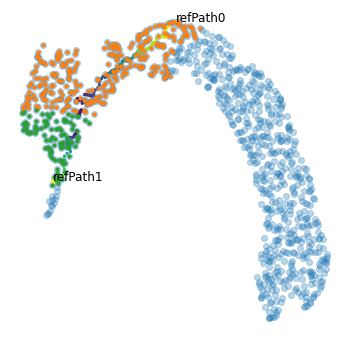


intercluster cell time adjustment
number of cells:  354
Cutoff is  0.042062065089036094
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (601, 457)
pair_cellIDs:  (233, 474)
pair_cellIDs:  (512, 509)
pair_cellIDs:  (180, 727)
pair_cellIDs:  (54, 11)
pair_cellIDs:  (783, 314)
pair_cellIDs:  (851, 418)
pair_cellIDs:  (403, 182)
pair_cellIDs:  (148, 505)
pair_cellIDs:  (703, 213)
pair_cellIDs:  (330, 62)
pair_cellIDs:  (555, 760)
pair_cellIDs:  (337, 100)
pair_cellIDs:  (503, 137)
pair_cellIDs:  (781, 908)

Peak mode:  most_frequent_shift


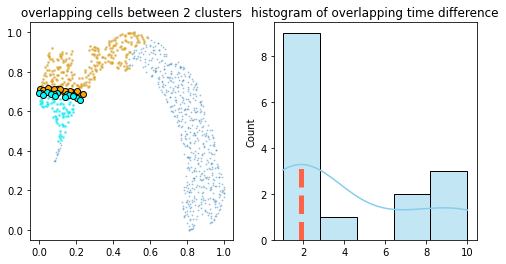

Time shift is:  2
The overlapping cells are: 
cell  233  from cluster  0  and  474  from cluster  1


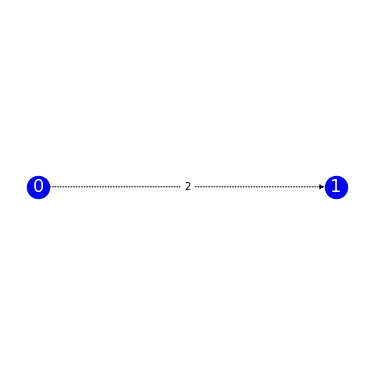

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: 2}



Cluster  2
Total cells in the cluster:  14
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[642]
number of paths:  1
number of subclusters:  1

Display reference paths for cluster 2


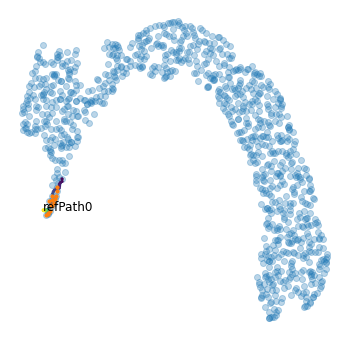




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  949
Cutoff is  0.06206490211147862
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (26, 329)
pair_cellIDs:  (130, 652)
pair_cellIDs:  (441, 372)
pair_cellIDs:  (696, 142)
pair_cellIDs:  (245, 273)
pair_cellIDs:  (787, 132)
pair_cellIDs:  (692, 735)
pair_cellIDs:  (944, 453)
pair_cellIDs:  (656, 156)
pair_cellIDs:  (678, 532)
pair_cellIDs:  (168, 31)
pair_cellIDs:  (238, 747)
pair_cellIDs:  (47, 327)
pair_cellIDs:  (677, 728)
pair_cellIDs:  (204, 2)
pair_cellIDs:  (392, 227)
pair_cellIDs:  (437, 199)
pair_cellIDs:  (651, 149)
pair_cellIDs:  (96, 749)
pair_cellIDs:  (68, 67)

Peak mode:  most_frequent_shift


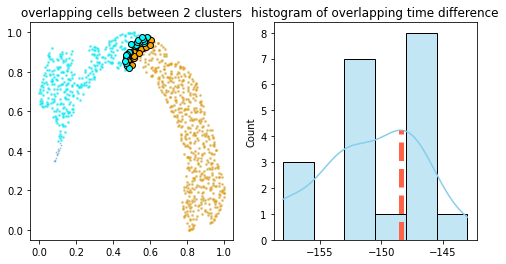

Time shift is:  -148
The overlapping cells are: 
cell  441  from cluster  0  and  372  from cluster  1

Consolidating time between clusters  0  and  2 ...
No close cells between clusters	 (0, 2)

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (495, 513)
pair_cellIDs:  (240, 646)
pair_cellIDs:  (150, 510)

Peak mode:  least_shift


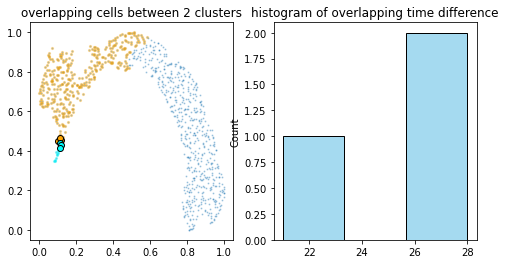

Time shift is:  21
The overlapping cells are: 
cell  150  from cluster  1  and  510  from cluster  2


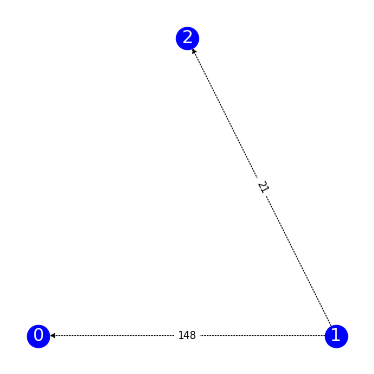

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -148, 2: -127}


All inter cluster cell time has been resolved.



There are 12329 cells.


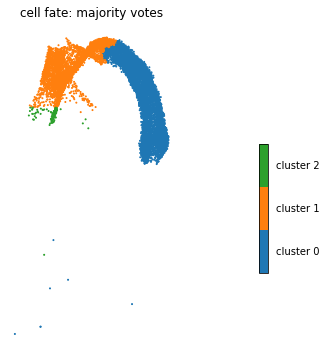

--- 65.796071767807 seconds ---
time: 1min 5s (started: 2022-06-04 17:34:25 -05:00)


In [4]:
%autoreload 2

cell_time = dict()
dt = 0.05
#t_total = {dt:int(10/dt)} 
t_total = {0.05: 200}
n_repeats = 10

grid = (30, 30)

load_cellDancer = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 3,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=-2)

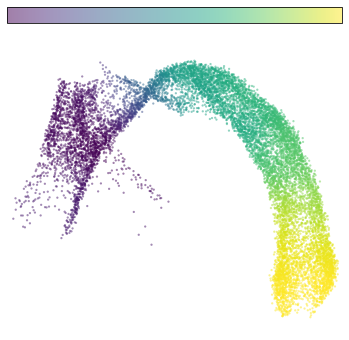

time: 3.08 s (started: 2022-06-04 17:36:34 -05:00)


In [6]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

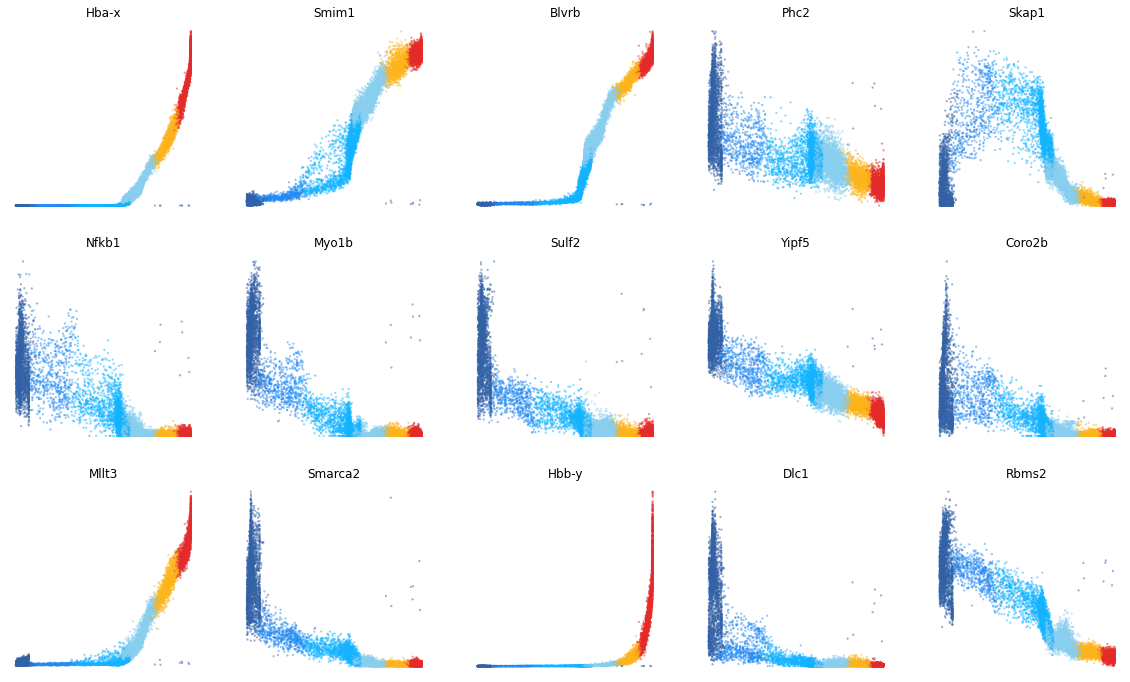

time: 36.8 s (started: 2022-06-04 17:36:47 -05:00)


In [7]:
# Show legend only
#_, ax = plt.subplots()
#cdplt.gene.scatter_gene(ax=ax,legend='only', colors=colormap.colormap_erythroid, s = 10, gene_name=None)
#ax.axis('off')
#plt.show()
gene_list=['Hba-x','Smim1','Blvrb','Phc2','Skap1',
           'Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b',
           'Mllt3','Smarca2', 'Hbb-y','Dlc1','Rbms2']

import math
ncols=5
fig = plt.figure(figsize=(4*ncols,4*len(gene_list)/ncols))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')


## Graph representation of the cell fates


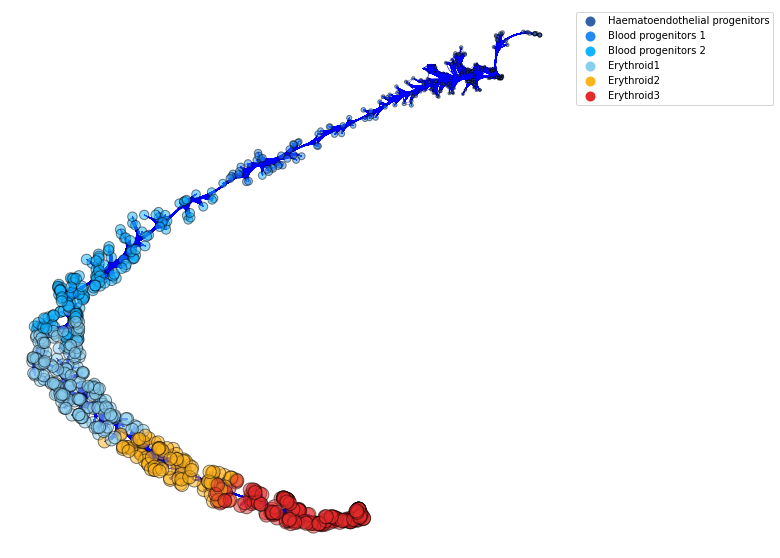

time: 5min 39s (started: 2022-06-04 17:43:41 -05:00)


In [9]:
%autoreload 2

from celldancer.plotting import graph
fig, ax = plt.subplots(figsize=(10,10))
graph.graph(ax, 
    load_cellDancer, 
    node_layout='forcedirected', 
    use_edge_bundling=True, 
    node_colors=colormap.colormap_erythroid, 
    edge_length=3, 
    node_sizes='pseudotime', 
    colorbar='on',
    legend='on')